<a href="https://colab.research.google.com/github/gabrielmercado90/Detecci-n-de-Pokemons/blob/main/Mini_Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 14997 (delta 18), reused 31 (delta 12), pack-reused 14951
Receiving objects: 100% (14997/14997), 13.41 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (10183/10183), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
#!ls '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/'
!ls '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/'

 backup
 completo.zip
'Copia de LeeryTransformarpropio.ipynb'
'Copia de Mini Proyecto 2.ipynb'
'Copia de YOLOv3_Tutorial (1).ipynb'
 Dataset_Pokemon
 generate_train.py
'Informe minipryecto 2.gdoc'
'Mini Proyecto 2.ipynb'
 obj.data
 obj.names
'Red Neuronal Convolucional Aplicada a la Detección de Emociones Primarias.docx'
 yolo
 yolov3_custom2.cfg
 yolov3_custom.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
#!cp '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/completo.zip' ../
!cp '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/completo.zip' ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../completo.zip -d data/

Archive:  ../completo.zip
  inflating: data/completo/1_1.jpg   
  inflating: data/completo/1_1.txt   
  inflating: data/completo/1_1_270.jpg  
  inflating: data/completo/1_1_270.txt  
  inflating: data/completo/1_1_90.jpg  
  inflating: data/completo/1_1_90.txt  
  inflating: data/completo/1_10.jpg  
  inflating: data/completo/1_10.txt  
  inflating: data/completo/1_10_270.jpg  
  inflating: data/completo/1_10_270.txt  
  inflating: data/completo/1_10_90.jpg  
  inflating: data/completo/1_10_90.txt  
  inflating: data/completo/1_2.jpg   
  inflating: data/completo/1_2.txt   
  inflating: data/completo/1_2_270.jpg  
  inflating: data/completo/1_2_270.txt  
  inflating: data/completo/1_2_90.jpg  
  inflating: data/completo/1_2_90.txt  
  inflating: data/completo/1_3.jpg   
  inflating: data/completo/1_3.txt   
  inflating: data/completo/1_3_270.jpg  
  inflating: data/completo/1_3_270.txt  
  inflating: data/completo/1_3_90.jpg  
  inflating: data/completo/1_3_90.txt  
  inflating: data/

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/yolov3_custom2.cfg'

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
#!cp '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/yolov3_custom.cfg' ./cfg
!cp '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/yolov3_custom.cfg' ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
#!cp '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/obj.names' ./data
#!cp '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/obj.data'  ./data

!cp '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/obj.names' ./data
!cp '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/obj.data'  ./data

In [ ]:
#!cp '/content/drive/MyDrive/10. Decimo Semestre/Deep Learning/Miniproyecto2/generate_train.py' ./
!cp '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/generate_train.py' ./

In [ ]:
!python generate_train.py

In [ ]:
!ls data/

9k.tree     dog.jpg	 horses.jpg		   obj.data	     scream.jpg
coco9k.map  eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco.names  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
completo    goal.txt	 labels			   person.jpg


In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-04-30 16:25:49--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-04-30 16:25:49--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.4MB/s    in 7.4s    

2021-04-30 16:25:57 (21.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
 total_bbox = 128458, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.816012), count: 4, class_loss = 0.131991, iou_loss = 0.122272, total_loss = 0.254262 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 128462, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.877722), count: 4, class_loss = 0.007446, iou_loss = 0.030308, total_loss = 0.037754 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.0000

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/backup/yolov3_custom_last.weights -dont_show

/bin/bash: ./darknet: No such file or directory


In [ ]:
imShow('chart.png')

AttributeError: ignored

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

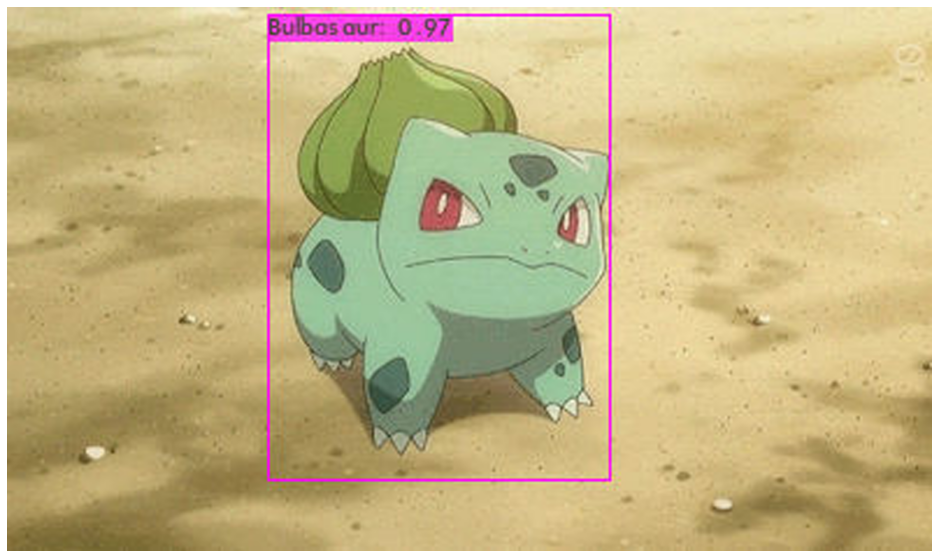

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test1.jpg' -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

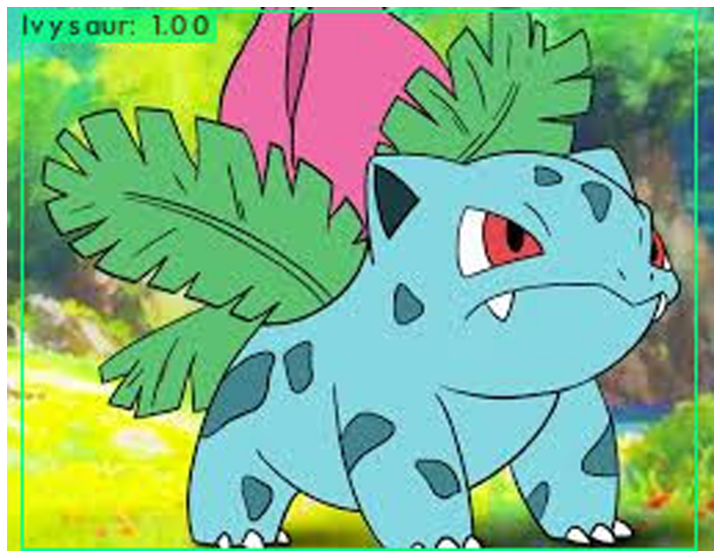

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test12.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test13.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test2.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test14.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test4.jpg' -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

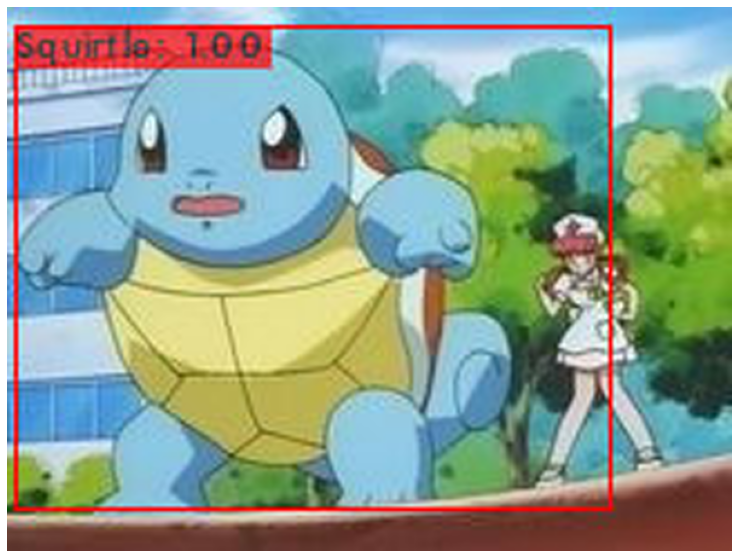

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test7.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/wartoltle_Test.jpg' -thresh 0.5
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/blastoise_Test.jpg' -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

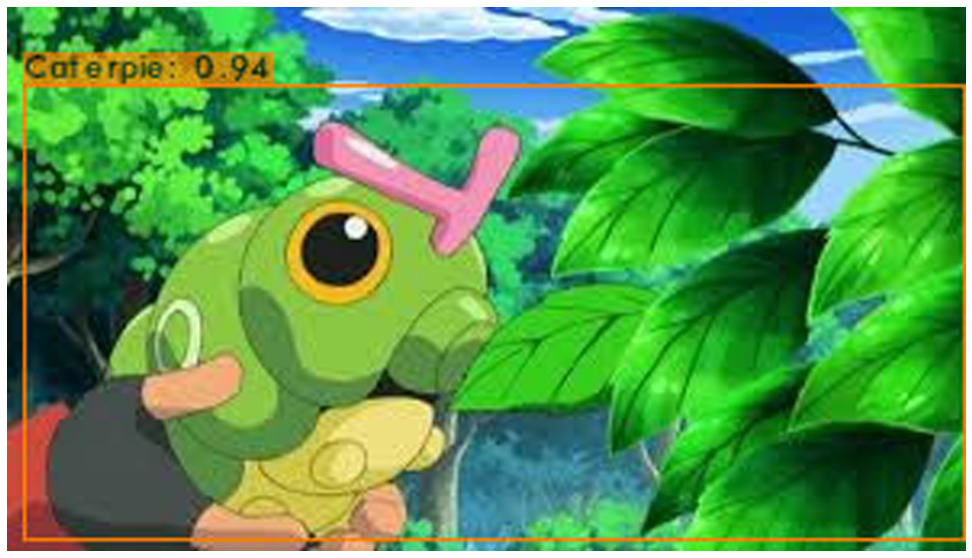

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test15.jpg' -thresh 0.5
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

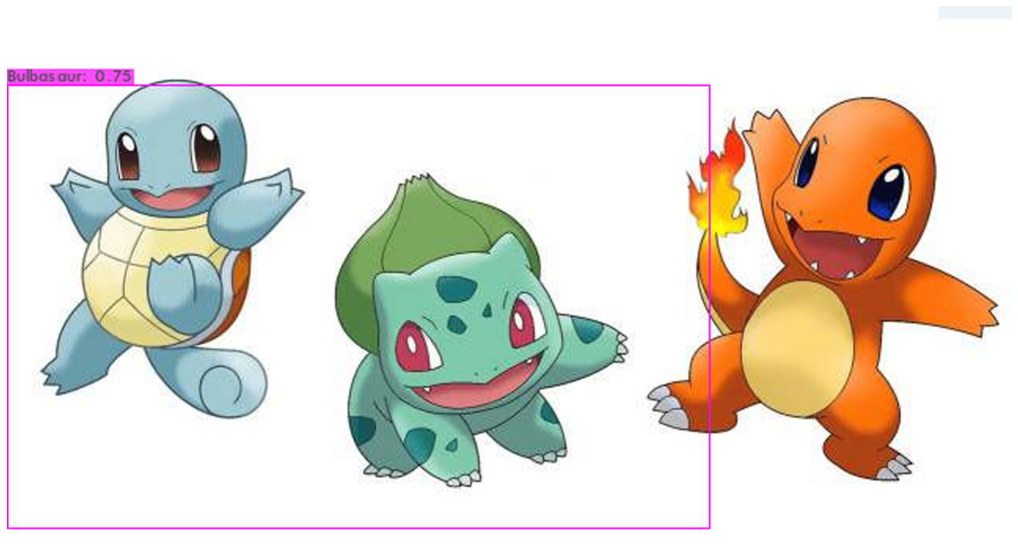

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg '/content/drive/MyDrive/backup/yolov3_custom_last8000.weights' '/content/drive/MyDrive/10moSemestre/DeepLearning/Miniproyecto2/Dataset_Pokemon/test8.jpg' -thresh 0.5
imShow('predictions.jpg')